In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris



In [6]:
iris = load_iris()
df=pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

In [8]:
df= df.drop (columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [12]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]

In [13]:
print("Before Cleaning:")
print(iris_df.isnull().sum())

Before Cleaning:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [14]:
missing_values = iris_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [15]:
duplicate_rows = iris_df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 1


In [16]:
iris_df.drop_duplicates(inplace=True)

In [17]:
duplicate_rows = iris_df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 0


In [18]:
class_distribution = iris_df['species'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64


In [19]:
clean_missing_values = iris_df.isnull().sum().sum()
clean_duplicate_rows = iris_df.duplicated().sum()
print("\nAfter Cleaning:")
print("Missing Values:", clean_missing_values)
print("Duplicate Rows:", clean_duplicate_rows)


After Cleaning:
Missing Values: 0
Duplicate Rows: 0


In [20]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
print("\nAfter Cleaning:")
print(iris_df.isnull().sum())


After Cleaning:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


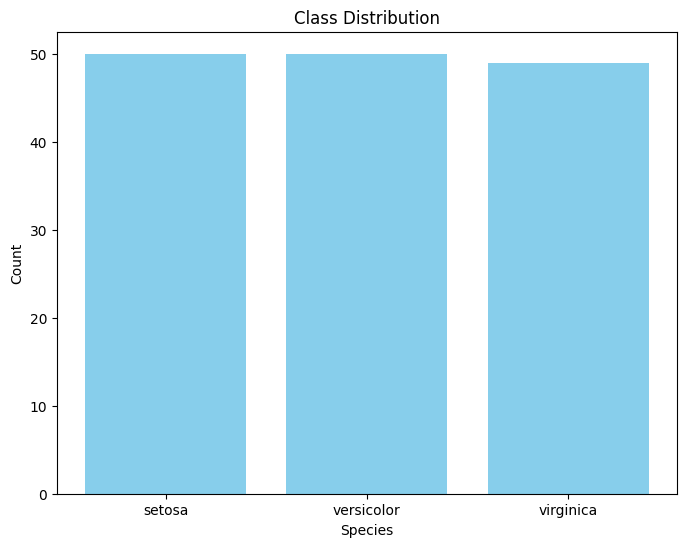

In [22]:
# Plotting the class distribution

plt.figure(figsize=(8, 6))
plt.bar(class_distribution.index, class_distribution.values, color='skyblue')
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks([0, 1, 2], iris['target_names'])
plt.show()

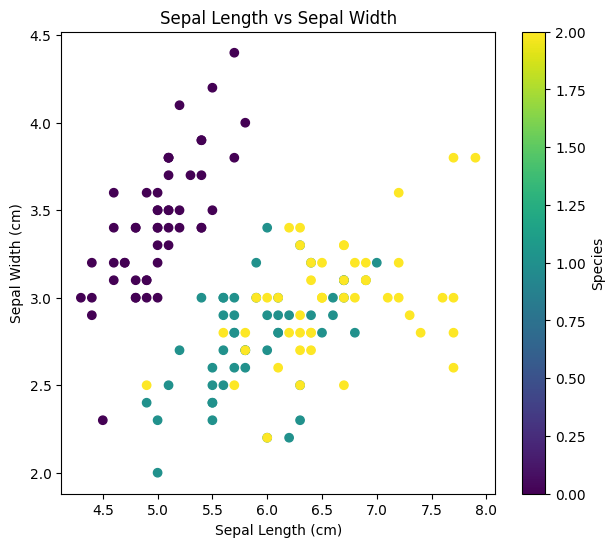

In [23]:
# Exploring relationships between features


species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris_df['species_label'] = iris_df['species'].map(species_map)

plt.figure(figsize=(7, 6))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['species_label'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.colorbar(label='Species')
plt.show()

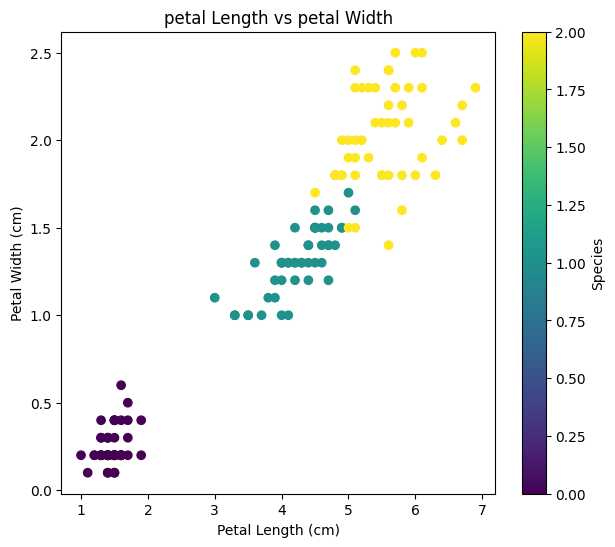

In [24]:
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
iris_df['species_label'] = iris_df['species'].map(species_map)

plt.figure(figsize=(7, 6))
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=iris_df['species_label'], cmap='viridis')
plt.xlabel('Petal Length (cm)')  # corrected label
plt.ylabel('Petal Width (cm)')
plt.title('petal Length vs petal Width')
plt.colorbar(label='Species')
plt.show()

<Axes: >

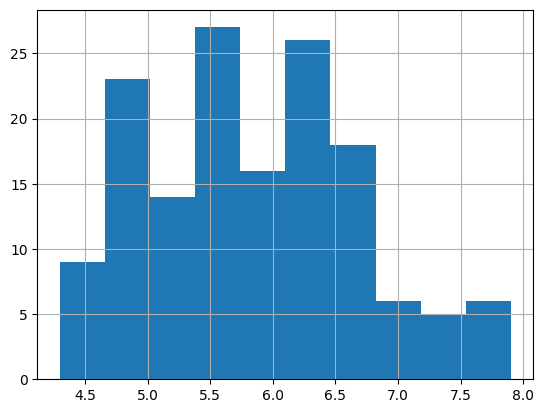

In [25]:
df['SepalLengthCm'].hist()

<Axes: >

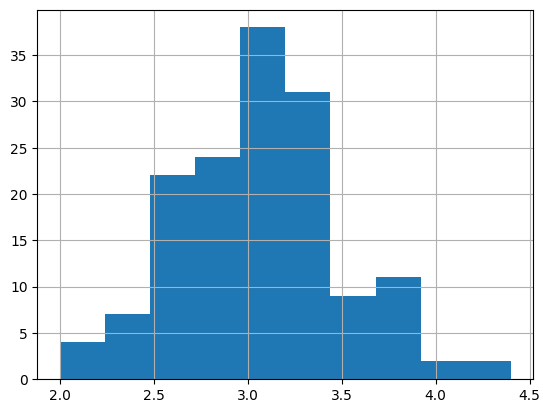

In [26]:
df['SepalWidthCm'].hist()

<Axes: >

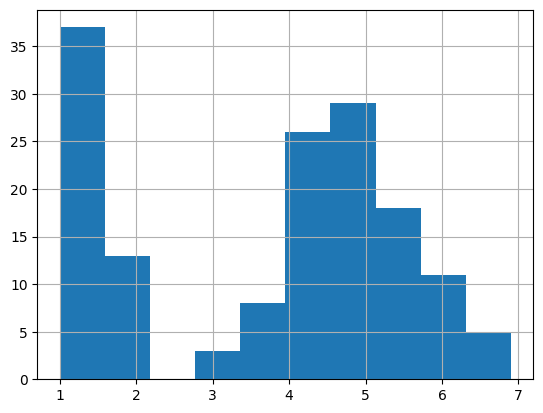

In [27]:
df['PetalLengthCm'].hist()

<Axes: >

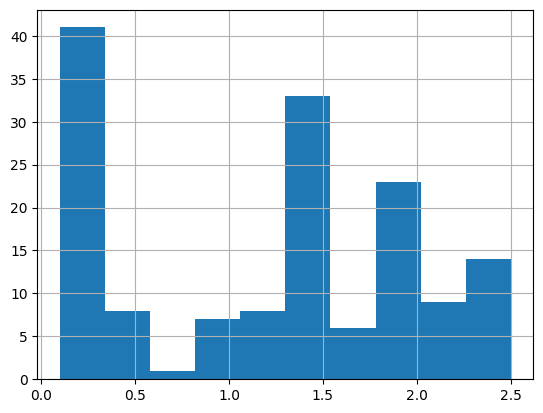

In [28]:
df['PetalWidthCm'].hist()

In [29]:
colors=['red','orange','blue']
species=['Iris-versicolor','Iris-virginica','Iris-setosa']

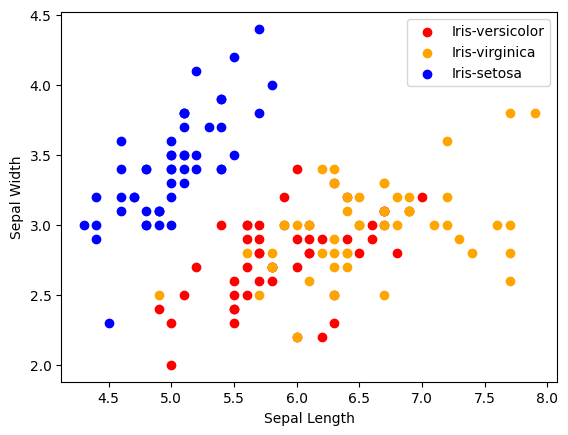

In [30]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

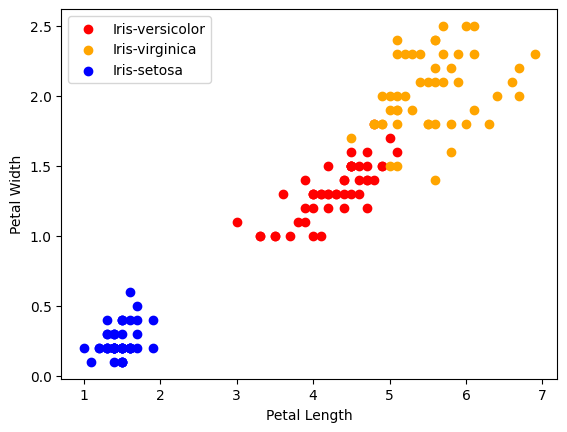

In [31]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

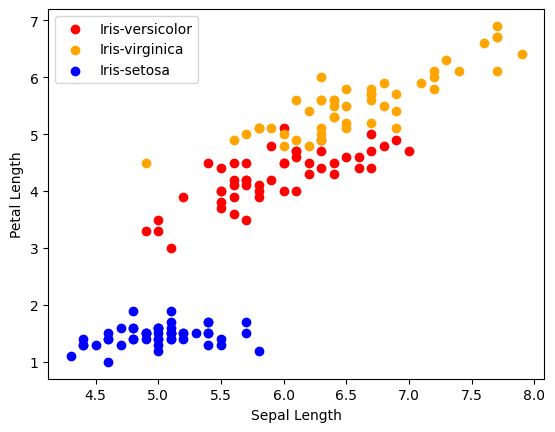

In [32]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'],c=colors[i],label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()

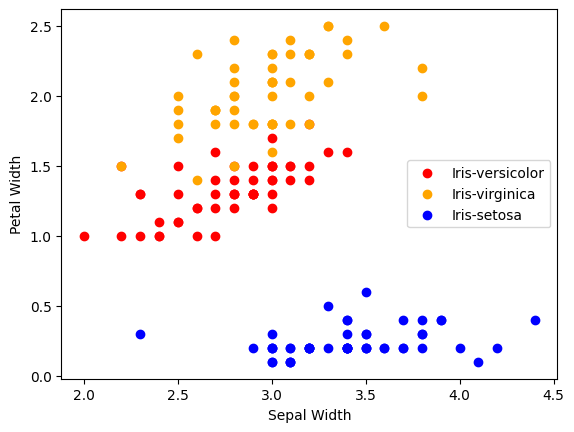

In [33]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel("Sepal Width")
    plt.ylabel("Petal Width")
    plt.legend()

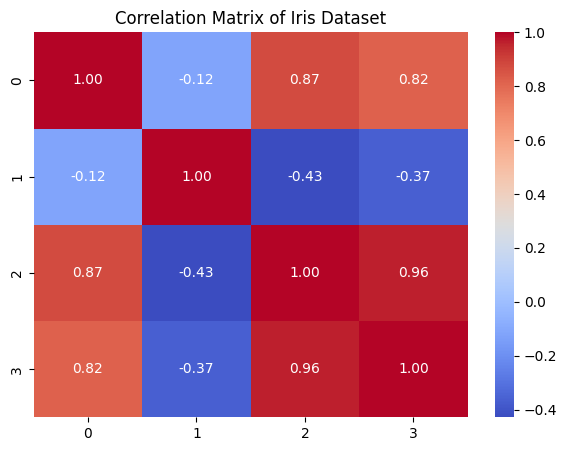

In [34]:
#Correlation Matrix

from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data)
corr = df.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [37]:
from sklearn.preprocessing import StandardScaler
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("\nBest parameters found:")
print(grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best parameters found:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 1.0


In [40]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
print("Accuracy:",model.score(x_test, y_test)*100)

Accuracy: 97.77777777777777


In [44]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
print("Accuracy:",model.score(x_test, y_test)*100)

Accuracy: 95.55555555555556


In [46]:
iris = load_iris()
X = iris.data
y = iris.target

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [49]:
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
y_pred = svm_classifier.predict(X_test_scaled)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [51]:

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [52]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


percentage_accuracy = accuracy * 100
print("Percentage Accuracy:", percentage_accuracy)

Accuracy: 1.0
Percentage Accuracy: 100.0
